## Importing Libraries

In [1]:
# feature extractoring and preprocessing data
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Keras
import keras

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [ ]:
# 음악파일 하나만 값 출력
import librosa
import librosa.display
audio_path = 'C:/Users/YOU-DB/Desktop/DEAM_audio/MEMD_audio/2.mp3'
x , sr = librosa.load(audio_path)
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

In [ ]:
#음악파일 시각화
cmap = plt.get_cmap('inferno')
i=1
plt.figure(figsize=(10,10))
for filename in os.listdir(f'C:/Users/YOU-DB/Desktop/DEAM_audio/MEMD_audio'):
    songname = f'C:/Users/YOU-DB/Desktop/DEAM_audio/MEMD_audio/{filename}'
    y, sr = librosa.load(songname, mono=True, duration=5)
    plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
    plt.axis('off');
    plt.savefig(f'img_data/{filename[:-3].replace(".", "")}.png')
    plt.clf()

In [2]:
# feature 가져오기
from sklearn.preprocessing import normalize
feature=[]
a=1;
for filename in os.listdir(f'C:/Users/YOU-DB/Desktop/features/features'):
    f=open(f'C:/Users/YOU-DB/Desktop/features/features/{filename}')
    print(filename,end=' ')
    fea=[]
    li=[]
    rdr = csv.reader(f)
    i=1
    for line in rdr:
        if 32 <= i <=61:
            li=line[0].split(';')
            li = list(map(float, li))
            del li[0]
            fea.append(li)
        i+=1
    f.close()
    fea = normalize(fea, axis=0, norm='max')
    #fea= fea / np.linalg.norm(fea, axis=1, keepdims=True)
    feature.append(fea)
    #if a==500:
        #break
    #a+=1

10.csv 1000.csv 1001.csv 1002.csv 1003.csv 1004.csv 1005.csv 1006.csv 1007.csv 1008.csv 1009.csv 101.csv 1010.csv 1011.csv 1012.csv 1013.csv 1014.csv 1015.csv 1016.csv 1017.csv 1018.csv 1019.csv 102.csv 1020.csv 1021.csv 1022.csv 1023.csv 1024.csv 1025.csv 1026.csv 1027.csv 1028.csv 1029.csv 103.csv 1030.csv 1031.csv 1032.csv 1033.csv 1034.csv 1035.csv 1036.csv 1037.csv 1038.csv 1039.csv 104.csv 1040.csv 1041.csv 1042.csv 1043.csv 1044.csv 1045.csv 1046.csv 1047.csv 1048.csv 1049.csv 105.csv 1050.csv 1051.csv 1052.csv 1053.csv 1054.csv 1055.csv 1056.csv 1057.csv 1058.csv 1059.csv 106.csv 1060.csv 1061.csv 1062.csv 1063.csv 1064.csv 1065.csv 1066.csv 1067.csv 1068.csv 1069.csv 107.csv 1070.csv 1071.csv 1072.csv 1073.csv 1074.csv 1075.csv 1076.csv 1077.csv 1078.csv 1079.csv 108.csv 1080.csv 1081.csv 1082.csv 1083.csv 1084.csv 1085.csv 1086.csv 1087.csv 1088.csv 1089.csv 109.csv 1090.csv 1091.csv 1092.csv 1093.csv 1094.csv 1095.csv 1096.csv 1097.csv 1098.csv 1099.csv 110.csv 1100.csv 1101

 1839.csv 184.csv 1840.csv 1841.csv 1842.csv 1843.csv 1844.csv 1845.csv 1846.csv 1847.csv 1848.csv 1849.csv 185.csv 1850.csv 1851.csv 1852.csv 1853.csv 1854.csv 1855.csv 1856.csv 1857.csv 1858.csv 1859.csv 186.csv 1860.csv 1861.csv 1862.csv 1863.csv 1864.csv 1865.csv 1866.csv 1867.csv 1868.csv 1869.csv 187.csv 1870.csv 1871.csv 1872.csv 1873.csv 1874.csv 1875.csv 1876.csv 1877.csv 1878.csv 1879.csv 188.csv 1880.csv 1881.csv 1882.csv 1883.csv 1884.csv 1885.csv 1886.csv 1887.csv 1888.csv 1889.csv 189.csv 1890.csv 1891.csv 1892.csv 1893.csv 1894.csv 1895.csv 1896.csv 1897.csv 1898.csv 1899.csv 19.csv 190.csv 1900.csv 1901.csv 1902.csv 1903.csv 1904.csv 1905.csv 1906.csv 1907.csv 1908.csv 1909.csv 191.csv 1910.csv 1911.csv 1912.csv 1913.csv 1914.csv 1915.csv 1916.csv 1917.csv 1918.csv 1919.csv 192.csv 1920.csv 1921.csv 1922.csv 1923.csv 1924.csv 1925.csv 1926.csv 1927.csv 1928.csv 1929.csv 193.csv 1930.csv 1931.csv 1932.csv 1933.csv 1934.csv 1935.csv 1936.csv 1937.csv 1938.csv 1939.csv 194

Error: line contains NULL byte

In [3]:
featured=np.array(feature,np.float32)
featured.shape

(1802, 30, 260)

In [ ]:
# mel-spec 가져오기
import librosa.display
frame_length = 0.025
frame_stride = 0.04
mel=[]

i=1;
for filename in os.listdir(f'C:/Users/YOU-DB/Desktop/DEAM_audio/MEMD_audio'):
    songname = f'C:/Users/YOU-DB/Desktop/DEAM_audio/MEMD_audio/{filename}'
    y, sr = librosa.load(songname, mono=True, duration=5)
    input_nfft = int(round(sr*frame_length))
    input_stride = int(round(sr*frame_stride))
    #spec=librosa.feature.melspectrogram(y=y, n_mels=40, n_fft=input_nfft, hop_length=input_stride)
    
    #plt.figure(figsize=(1,1))
    #librosa.display.specshow(librosa.power_to_db(spec, ref=np.max),sr=sr, hop_length=input_stride)
    #plt.tight_layout()
    #plt.axis('off'), plt.xticks([]), plt.yticks([])
    #plt.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, hspace = 0, wspace = 0)
    #plt.savefig(f'mel_img_data/{filename[:-3].replace(".", "")}.png',bbox_inces='tight', pad_inches=0, dpi=100)
    mel.append(librosa.feature.melspectrogram(y=y, n_mels=40, n_fft=input_nfft, hop_length=input_stride))

In [ ]:
mel=np.array(mel)
mel.shape

In [ ]:
#이미지 파일 가져오기
import PIL.Image as pilimg
img=[]
for filename in os.listdir(f'C:/Users/YOU-DB/Code/git/Capstone-Design/sentiment-analysis/mel_img_data'):
    img=pilimg.open(f'C:/Users/YOU-DB/Code/git/Capstone-Design/sentiment-analysis/mel_img_data/{filename}')
img=np.array(img)
img.shape

In [ ]:
## mfcc값 가져오기
test_mfccs=[]
pad2d=lambda a, i: a[:, 0: i] if a.shape[1] > i else np.hstack((a, np.zeros(i-a.shape[0])))
for filename in os.listdir(f'C:/Users/YOU-DB/Desktop/DEAM_audio/MEMD_audio'):
    songname = f'C:/Users/YOU-DB/Desktop/DEAM_audio/MEMD_audio/{filename}'
    y, sr = librosa.load(songname, mono=True, duration=5)
    mfcc=librosa.feature.mfcc(y)
    padded_mfcc=pad2d(mfcc,40)
    test_mfccs.append(padded_mfcc)
test_mfccs=np.array(test_mfccs)

In [ ]:
test_mfccs.shape

In [ ]:
#data파일 header 쓰기
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [4]:
#파일의 arousal, valence 값 가져와서 배열에 저장
f = open('C:/Users/YOU-DB/Desktop/DEAM_Annotations/annotations/annotations averaged per song/song_level/static_annotations_averaged_songs_1_2000.csv','r')
rdr = csv.reader(f)

id=[]
pre_ars=[]
pre_val=[]
i=0
for line in rdr:
    if(i!=0):
        id.append(line[0])
        pre_ars.append(float(line[1]))
        pre_val.append(float(line[3]))
    i=i+1
f.close()

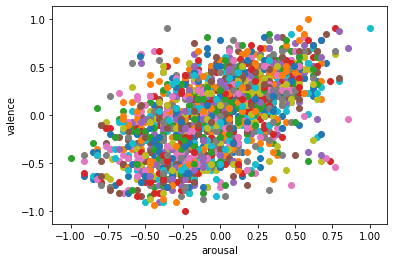

In [5]:
# arousal, valence 정규화
noars=[]
noval=[]
for ars in pre_ars:
    noars.append((ars-((max(pre_ars)-min(pre_ars))/2+min(pre_ars)))/((max(pre_ars)-min(pre_ars))/2))
for val in pre_val:
    noval.append((val-((max(pre_val)-min(pre_val))/2+min(pre_val)))/((max(pre_val)-min(pre_val))/2))
plt.xlabel('arousal')
plt.ylabel('valence')
for ars,val in zip(noars,noval):
    plt.scatter(ars,val)

In [ ]:
# 정규화된 값 가지고 8가지 답 만들기
emotions = 'light happy comfortable calm gloomy cry scary tense'.split()
ans=[]
cnt=[0 for i in range(8)]
for ars,val in zip(noars,noval):
    if ars>=0:
        if val>=0:
            if val>=ars:
                ans.append(emotions[0])#경쾌한
                cnt[0]+=1
            else:
                ans.append(emotions[1])#행복한
                cnt[1]+=1
        else:
            if ars>=-val:
                ans.append(emotions[2])#편안한
                cnt[2]+=1
            else:
                ans.append(emotions[3])#잔잔한
                cnt[3]+=1
    else:
        if val<=0:
            if -val>=-ars:
                ans.append(emotions[4])#우울한
                cnt[4]+=1
            else:
                ans.append(emotions[5])#울고싶은
                cnt[5]+=1
        else:
            if -ars>=val:
                ans.append(emotions[6])#무서운
                cnt[6]+=1
            else:
                ans.append(emotions[7])#긴장되는
                cnt[7]+=1
print(ans) 

In [6]:
# 정규화된 값 가지고 4가지 답 만들기
emotions = 'light happy comfortable calm gloomy cry scary tense'.split()
ans1=[]
ans2=[]
ans3=[]
ans4=[]
cnt=[0 for i in range(8)]
for ars,val in zip(noars,noval):
    if ars>=0:
        if val>=0:
            ans1.append(emotions[0])#경쾌한
            ans2.append('N')
            ans3.append('N')
            ans4.append('N')
        else:
            ans1.append('N')
            ans2.append(emotions[2])#편안한
            ans3.append('N')
            ans4.append('N')
    else:
        if val<=0:
            ans1.append('N')
            ans2.append('N')
            ans3.append(emotions[4])#우울한
            ans4.append('N')
        else:
            ans1.append('N')
            ans2.append('N')
            ans3.append('N')
            ans4.append(emotions[6])#무서운

In [ ]:
#data파일 분석 값 쓰기
file = open('data.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
for filename in os.listdir(f'C:/Users/YOU-DB/Desktop/DEAM_audio/MEMD_audio'):
    songname = f'C:/Users/YOU-DB/Desktop/DEAM_audio/MEMD_audio/{filename}'
    y, sr = librosa.load(songname, mono=True, duration=30)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    rmse = librosa.feature.rmse(y=y)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    to_append = f'{filename[:-4]} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
    for e in mfcc:
        to_append += f' {np.mean(e)}'
    i=0
    for ids in id:
        if ids==filename[:-4]:
            to_append += f' {ans[i]}'
            break
        i+=1           
    #to_append += f' {g}'
    file = open('data.csv', 'a', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())
    print(filename[:-4],end=" ")

In [ ]:
data = pd.read_csv('data.csv')
data.head()

In [ ]:
data=data.drop(['filename'],axis=1)

In [ ]:
#genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(ans1)

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

In [7]:
##
##test_X_ex=np.expand_dims(test_mfccs,-1)
#X_train = test_mfccs.reshape((test_mfccs.shape[0], test_mfccs.shape[1], test_mfccs.shape[2], 1))
X = featured.reshape((featured.shape[0], featured.shape[1], featured.shape[2], 1))
X.shape

(1802, 30, 260, 1)

In [8]:
##
from tensorflow.keras.utils import to_categorical
encoder = LabelEncoder()
y = encoder.fit_transform(ans1)
y=to_categorical(y)
y.shape

(1802, 2)

## Dividing data into training and Testing set

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [10]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1441, 30, 260, 1) (361, 30, 260, 1) (1441, 2) (361, 2)


In [11]:
len(y_train)

1441

In [12]:
len(y_test)

361

## Classification with Keras

### 1. Using CNN

In [16]:
from keras import models
from keras import layers
from keras import optimizers, regularizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization, Dropout
from keras import Input
from keras.engine import Model

model = models.Sequential()

model.add(Conv2D(64, (3, 3), input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), activation='relu',
                 padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', 
                 kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), activation='relu',
                 padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', 
                 kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (3, 3), input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), activation='relu',
                 padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', 
                 kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())  # 이전 CNN 레이어에서 나온 3차원 배열은 1차원으로 뽑아줍니다)
model.add(Dense(32, activation = 'relu', kernel_initializer='he_normal'))
#model.add(Dropout(0.2))
model.add(Dense(2,kernel_initializer='he_normal'))
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 30, 260, 64)       640       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 30, 260, 64)       36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 130, 64)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 130, 32)       18464     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 15, 130, 32)       9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 65, 32)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 7, 65, 16)        

In [17]:
#model.compile(loss = 'categorical_crossentropy', optimizer ='adam', metrics = ['accuracy'])
model.compile(loss = 'binary_crossentropy', optimizer = optimizers.Adam(lr = 0.001), metrics = ['acc'])

In [ ]:
history = model.fit(X_train, y_train, batch_size = 35, epochs = 100, validation_data=(X_test, y_test))

Train on 1441 samples, validate on 361 samples
Epoch 1/100
1441/1441 [==============================] - 30s 21ms/step - loss: 3.6998 - acc: 0.6301 - val_loss: 3.6834 - val_acc: 0.6427
Epoch 2/100
1441/1441 [==============================] - 31s 22ms/step - loss: 3.6810 - acc: 0.6301 - val_loss: 3.6646 - val_acc: 0.6427
Epoch 3/100
1441/1441 [==============================] - 30s 21ms/step - loss: 3.6621 - acc: 0.6301 - val_loss: 3.6457 - val_acc: 0.6427
Epoch 4/100
1441/1441 [==============================] - 32s 22ms/step - loss: 3.6433 - acc: 0.6301 - val_loss: 3.6268 - val_acc: 0.6427
Epoch 5/100
1190/1441 [=======================>......] - ETA: 4s - loss: 3.6268 - acc: 0.6286

In [ ]:
model.save_weights('conv6.h5')
#model.save_weights('batch2.h5')

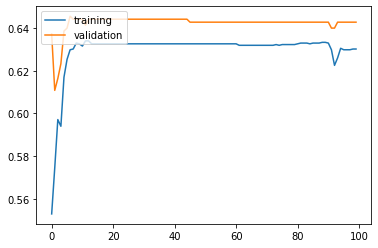

In [19]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(X_test,y_test)

In [ ]:
print('test_acc: ',test_acc)

### 2. Using LinearSVC

In [ ]:
from sklearn.svm import LinearSVC

model = LinearSVC(C=1)
model.fit(X_train, y_train)

In [ ]:
score = model.score(X_train, y_train)
print(score)

In [ ]:
print('test_acc: ',clf.score(X_test,y_test))

### 3. Using KNeighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=6)
clf.fit(X_train, y_train)

In [ ]:
score = clf.score(X_train, y_train)
print(score)

In [ ]:
print('test_acc: ',clf.score(X_test,y_test))